In [72]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'font.size' : 14
})


In [73]:
df = pd.read_csv("log/describe_all_cpu_ruche.csv")
df_gpu = pd.read_csv("log/describe_all_gpu_ruche_large.csv")

# display(df_gpu)


#we drop the false values
df_gpu = df_gpu.drop(df_gpu[df_gpu['error_mean'] > 10e-4 & df_gpu['kernel']=="BasicRange1D"].index)

TypeError: Cannot perform 'rand_' with a dtyped [object] array and scalar of type [bool]

In [ ]:
kernels_name = df["kernel"].unique()

values_cpu = {
    #'kernel_name': ([size1,size2,size3], [value1, value2, value3])
}

values_gpu = {}

for kernel_type in kernels_name:
    #fill gpu
    one_kernel_gpu = df_gpu[df_gpu["kernel"] == kernel_type]
    values_gpu[kernel_type] = (one_kernel_gpu["global_size"], one_kernel_gpu['cellspersec_mean'])

    #fill cpu
    one_kernel_cpu = df[df["kernel"] == kernel_type]
    values_cpu[kernel_type] = (one_kernel_cpu["global_size"], one_kernel_cpu['cellspersec_mean'])

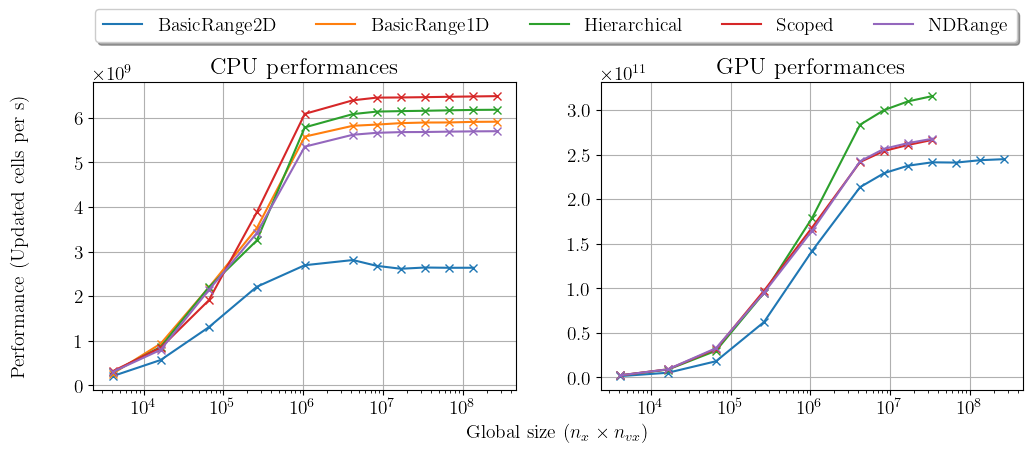

In [ ]:
fig = plt.figure(figsize=(12,4))#, constrained_layout=True)
ax = fig.add_subplot(111)    # The big subplot
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Tracer les données
for key, data in values_cpu.items():
    sizes, perf = data

    ax1.plot(sizes, perf*10e9, 'x-', label=key)
    
    #fake plot to set the legend
    ax.plot(0, 0, label=key)
    

for key, data in values_gpu.items():
    sizes, perf = data
    ax2.plot(sizes, perf*10e9, 'x-', label=key)
    


# ax[0].set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])

box = ax.get_position()

ax.legend(loc='lower center', bbox_to_anchor=(box.width/2 + 0.11, box.width/2 + 0.71), fancybox=True, shadow=True, ncol=5)

#set common labels (i.e. the labels of the large subplot)
ax.set_ylabel('Performance (Updated cells per s)')
ax.set_xlabel('Global size ($n_x \\times n_{vx}$)')

#Turn off axis for the large subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1.set_title('CPU performances')
ax2.set_title('GPU performances')
subfigs = [ax1, ax2]
for subfig in subfigs:
    subfig.grid(True)
    subfig.set_xscale('log', base=10)

plt.show()

In [ ]:
KERNEL_TYPE = "Hierarchical"
same_kernel = df[df['kernel']==KERNEL_TYPE]

sizes = same_kernel['global_size']

gbs = same_kernel['throughput_mean']
gbs_std = same_kernel['throughput_std']

errors = same_kernel['error_mean']
errors_std = same_kernel['error_std']

df

,global_size,nx,nvx,kernel,error_mean,error_std,runtime_mean,runtime_std,cellspersec_mean,cellspersec_std,throughput_mean,throughput_std,gpu
0,4096,64,64,BasicRange2D,3.523250e-04,0.000000e+00,0.209933,0.051004,0.020659,0.005137,0.330547,0.082195,0
1,16384,128,128,BasicRange2D,1.952420e-05,0.000000e+00,0.300601,0.067272,0.056848,0.011106,0.909569,0.177700,0
2,65536,256,256,BasicRange2D,9.115920e-07,0.000000e+00,0.516127,0.077787,0.130257,0.023174,2.084114,0.370783,0
3,262144,512,512,BasicRange2D,2.507810e-08,3.376951e-24,1.207007,0.171045,0.221043,0.028620,3.536694,0.457926,0
4,1048576,1024,1024,BasicRange2D,7.845860e-10,0.000000e+00,3.896533,0.139676,0.269428,0.009388,4.310845,0.150206,0
5,4194304,1024,4096,BasicRange2D,7.845940e-10,0.000000e+00,14.949072,0.617638,0.281006,0.010931,4.496099,0.174890,0
6,8388608,1024,8192,BasicRange2D,7.845940e-10,0.000000e+00,31.368080,1.449814,0.267954,0.011921,4.287259,0.190741,0
7,16777216,1024,16384,BasicRange2D,7.845940e-10,0.000000e+00,64.184128,1.241607,0.261485,0.005013,4.183760,0.080202,0
8,33554432,1024,32768,BasicRange2D,7.845940e-10,0.000000e+00,127.036240,2.748432,0.264250,0.005658,4.228004,0.090532,0
9,67108864,1024,65536,BasicRange2D,7.845940e-10,0.000000e+00,254.604360,3.683918,0.263634,0.003815,4.218142,0.061046,0
